goals:

*open both files (metadata and covers)

*access specific/interesting data from metadata with intention to eventually visualize

*join key word categories?

*compile cover data together with those metatdata categories for each book

**clean keyword column and count number of occurances in overall corpus (ie: how many times does the word "secrets" appear on a book cover?)

*Ideally: map and relate those occurances back to book titles and other metadta to answer questions (example: how many books with "secrets" are picture books, YA, novels, etc? or how frequently does "secrets" appear with identity keywords, like gender or sexuality?)


Open file and import pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd




Mounted at /content/drive


In [ ]:
bookfile = pd.read_csv('/content/drive/MyDrive/EnhancedPENAmericaData - Removed Duplicates (1).csv')
#bookfile.head()

,Author,Title,# of Bans,PubYear,Imprint,Publisher,Place of Publication,Genre,Age Level,Extent,...,Cover Logged?,Notes,AuthorCareerStage,AwardWinner,NBA,StonewallBA,NAACPImage,AwardNum,GoodreadsRatings,GoodreadsStars
0,"Sotomayor, Sonia","¡Solo pregunta!: Sé Diferente, Sé Valiente, Sé Tú",1,2019,Philomel Books,Penguin Random House,"New York, NY",Picture Books,Children's,1 volume (unpaged),...,y,NaN,4.0,0,0,0,0,0,"2,959",4.48
1,"Lainez, Rene Colato",¡Vámonos! Let's Go!,1,2015,Holiday House,Independent (Trustbridge Global Media),"New York, NY",Picture Books,Children's,1 volume (unpaged),...,y,NaN,6.0,0,0,0,0,0,55,3.55
2,"Delpit, Lisa","""Multiplication Is for White People"": Raising ...",1,2012,The New Press,Independent (The New Press),NaN,Education,Adult,NaN,...,y,School,6.0,0,0,0,0,0,"5,777",4.20
3,"Thomas, Rachael L.",#BlackLivesMatter: Protesting Racism,2,2019,Abdo & Daughters,Independent (ABDO),"Minneapolis, MN",Race,Young Adult,32 pages,...,y,NaN,6.0,0,0,0,0,0,12,3.58
4,"Ukazu, Ngozi","#Hockey (Check, Please! Series)",3,2018,First Second,Macmillan,New York,Graphic Novel,Young Adult,"240, 37 pages",...,y,NaN,1.0,0,0,0,0,0,"23,600",4.25


In [ ]:
coverfile = pd.read_csv("/content/drive/MyDrive/data/BannedBooks_covers.csv")
#coverfile.head(5)

,Timestamp,Title,Author,Cover Graphics,Which?,Is there a figure?,How many?,Species,Gender,Race,...,Violence/Death.3,Substances.3,Secrets.3,Parents.3,Rebellion/Revolution/Activism.3,Religion.3,Oppression/Repression/Systemic Issues.3,Socioeconomics.2,School,School.1
0,7/5/2023 10:26:30,47,Walter Mosley,Illustration,Landscape,Yes,3+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,liberation,NaN,slave*,NaN,NaN,NaN
1,7/17/2023 9:15:54,¡Vamonos! Let's Go!,Rene Colato Lainez,Illustration,"Landscape, Object",Yes,3+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/5/2023 10:16:28,"""Multiplication Is for White People"": Raising ...",Lisa Delpit,Photo,NaN,Yes,1,Human,Male,Nonwhite,...,NaN,NaN,NaN,NaN,NaN,NaN,achievement gap,NaN,"school, teacher",NaN
3,7/5/2023 10:20:36,#BlackLivesMatter: Protesting Racism,Rachael L. Thomas,Photo,NaN,Yes,1,Human,Male,Nonwhite,...,NaN,NaN,NaN,NaN,"social-movement, #blacklivesmatter",NaN,"racism, slave*",NaN,NaN,NaN
4,6/26/2023 11:19:52,#Hockey,Ngozi Ukazu,Illustration,NaN,Yes,3+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Will need to associate titles that are identical between files?

In [ ]:
completebook_metadata = pd.merge(bookfile, coverfile, on = 'Title')
#completebook_metadata.head(10)

,Author_x,Title,# of Bans,PubYear,Imprint,Publisher,Place of Publication,Genre,Age Level,Extent,...,Violence/Death.3,Substances.3,Secrets.3,Parents.3,Rebellion/Revolution/Activism.3,Religion.3,Oppression/Repression/Systemic Issues.3,Socioeconomics.2,School,School.1
0,"Delpit, Lisa","""Multiplication Is for White People"": Raising ...",1,2012,The New Press,Independent (The New Press),NaN,Education,Adult,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,achievement gap,NaN,"school, teacher",NaN
1,"Thomas, Rachael L.",#BlackLivesMatter: Protesting Racism,2,2019,Abdo & Daughters,Independent (ABDO),"Minneapolis, MN",Race,Young Adult,32 pages,...,NaN,NaN,NaN,NaN,"social-movement, #blacklivesmatter",NaN,"racism, slave*",NaN,NaN,NaN
2,"McNeil, Gretchen",#MurderTrending (MurderTrending Series),1,2018,Freeform,Independent (Disney Publishing),"Los Angeles, CA; New York, NY",Mystery,Young Adult,339 pages,...,"death*, kill*",NaN,NaN,NaN,NaN,NaN,prison,NaN,NaN,NaN
3,"Mac, Carrie",10 Things I Can See from Here,2,2017,Alfred A. Knopf Books for Young Readers,Penguin Random House,"New York, NY",LGBT,Young Adult,312 pages,...,NaN,"addiction, sobriety",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ewert, Marcus","10,000 Dresses",1,2008,Triangle Square,Independent (Seven Stories Press),"New York, NY",LGBT,Children's,1 volume (unpaged),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Henderson, Elisabeth",100 Questions You'd Never Ask Your Parents: St...,1,2007,Roaring Brook Press,Macmillan,"Richmond, VA",Self Help,Young Adult,213 pages,...,NaN,alcohol,"taboo, mystery, stigma, unmentionable",parent,NaN,NaN,NaN,NaN,NaN,NaN
6,"Brynie, Faith Hickman",101 Questions About Reproduction: Or How 1 + 1...,1,2004,21st Century,Independent (Lerner Publishing Group),"Minneapolis, MN",NaN,Young Adult,176 pages,...,NaN,NaN,questions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Brynie, Faith Hickman",101 Questions About Sex and Sexuality: With An...,1,2003,Twenty-First Century Books,Independent (Lerner),"Brookfield, CT",NaN,Young Adult,176 pages,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Levithan, David",19 Love Songs,1,2020,Penguin Random House,Penguin Random House,NaN,Short Stories,Young Adult,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,school,NaN
9,"Lassieur, Allison",25 Women Who Dared to Go,1,2018,Compass Point Books,Independent (Coughlan Company),"North Mankato, MN",Biography,Young Adult,64 pages,...,war,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get publisher data only:

In [ ]:
pubdata = completebook_metadata[["Author_x", "Title", "Imprint", "Publisher"]]
#pubdata.head(10)





,Author_x,Title,Imprint,Publisher
0,"Delpit, Lisa","""Multiplication Is for White People"": Raising ...",The New Press,Independent (The New Press)
1,"Thomas, Rachael L.",#BlackLivesMatter: Protesting Racism,Abdo & Daughters,Independent (ABDO)
2,"McNeil, Gretchen",#MurderTrending (MurderTrending Series),Freeform,Independent (Disney Publishing)
3,"Mac, Carrie",10 Things I Can See from Here,Alfred A. Knopf Books for Young Readers,Penguin Random House
4,"Ewert, Marcus","10,000 Dresses",Triangle Square,Independent (Seven Stories Press)
5,"Henderson, Elisabeth",100 Questions You'd Never Ask Your Parents: St...,Roaring Brook Press,Macmillan
6,"Brynie, Faith Hickman",101 Questions About Reproduction: Or How 1 + 1...,21st Century,Independent (Lerner Publishing Group)
7,"Brynie, Faith Hickman",101 Questions About Sex and Sexuality: With An...,Twenty-First Century Books,Independent (Lerner)
8,"Levithan, David",19 Love Songs,Penguin Random House,Penguin Random House
9,"Lassieur, Allison",25 Women Who Dared to Go,Compass Point Books,Independent (Coughlan Company)


Write a new file with publisher counts

In [ ]:
bigfive = pubdata["Publisher"]
bigfive.head()
bigfivecounts = {"Penguin Random House": 0, "Macmillan": 0, "Hachette": 0, "Simon & Schuster": 0, "HarperCollins": 0, "Independent": 0}
for publisher in bigfive:
  if publisher in bigfivecounts:
    bigfivecounts[publisher] += 1
  else:
    bigfivecounts["Independent"] += 1
print(bigfivecounts)

{'Penguin Random House': 233, 'Macmillan': 90, 'Hachette': 75, 'Simon & Schuster': 105, 'HarperCollins': 121, 'Independent': 474}


In [ ]:
pubcountheader = ["Publisher", "Counts"]
pubcountrowdata = []
for publisher in bigfivecounts:
  row = [publisher, bigfivecounts[publisher]]
  pubcountrowdata.append(row)
#print(pubcountrowdata)

pubdata = pd.DataFrame(pubcountrowdata, columns= pubcountheader)
pubdata.to_csv('publishercounts.csv', index = False)

View Publisher Count as a dataframe and visualize

In [ ]:
pubcsv = pd.read_csv('publishercounts.csv')
#pubcsv.head(6)

,Publisher,Counts
0,Penguin Random House,233
1,Macmillan,90
2,Hachette,75
3,Simon & Schuster,105
4,HarperCollins,121
5,Independent,474


In [ ]:
import matplotlib.pyplot as plt

plt.close("all")

<Figure size 640x480 with 0 Axes>

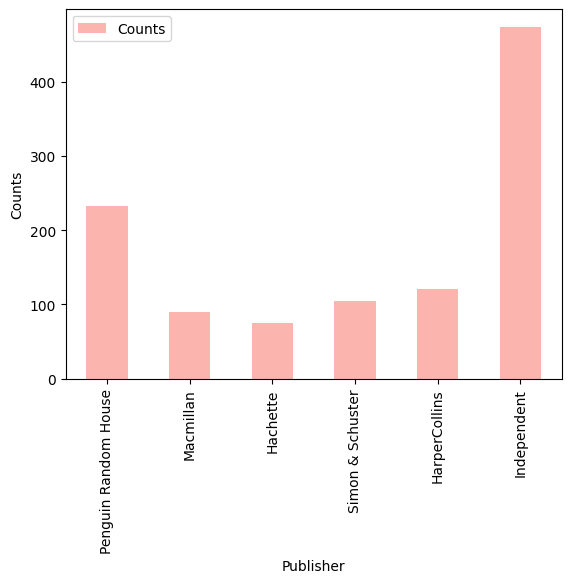

In [ ]:
plt.figure();

pubcsv.set_index("Publisher").plot.bar(xlabel="Publisher", ylabel="Counts",colormap="Pastel1",);


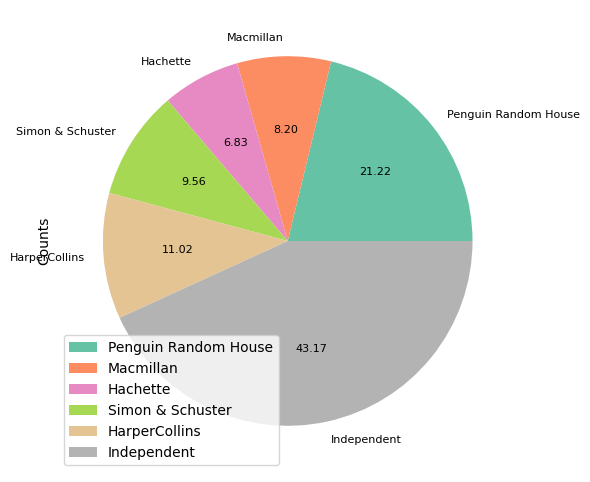

In [ ]:
pubcsv.set_index("Publisher").plot.pie(y="Counts",
    colormap="Set2",
    autopct="%.2f",
    fontsize=8,
    figsize=(6, 6),
);


duplicate process to get publication year and genre counts

In [ ]:
yeardata = completebook_metadata[["Author_x", "Title", "PubYear"]]

yeardata.head()

,Author_x,Title,PubYear
0,"Delpit, Lisa","""Multiplication Is for White People"": Raising ...",2012
1,"Thomas, Rachael L.",#BlackLivesMatter: Protesting Racism,2019
2,"McNeil, Gretchen",#MurderTrending (MurderTrending Series),2018
3,"Mac, Carrie",10 Things I Can See from Here,2017
4,"Ewert, Marcus","10,000 Dresses",2008


In [ ]:
years = yeardata["PubYear"]
yearcounts = {}
for year in years:
  if year not in yearcounts:
    yearcounts[year] = 0
    yearcounts[year] += 1
  elif year in yearcounts:
    yearcounts[year] += 1

print(yearcounts)

{'2012': 35, '2019': 128, '2018': 109, '2017': 74, '2008': 32, '2007': 24, '2004': 14, '2003': 16, '2020': 113, '2011': 23, '2006': 25, '2021': 64, '2016': 61, '2005': 26, '1994': 6, '2000': 13, '2015': 55, '2010': 29, '1959': 1, '1991': 7, '2009': 27, '2013': 39, '2001': 11, '2014': 46, '1982': 3, '1993': 10, '1987': 2, '1999': 13, '1995': 6, '1972': 2, '1977': 3, '1980': 1, '1990': 5, '2002': 13, '1975': 1, '1992': 8, '1998': 3, '1953': 1, '1997': 10, '1986': 3, '1971': 3, '1989': 4, '1996': 1, '1978': 1, '2022': 4, '1955': 1, '1954': 1, '1845': 1, '1956': 1, '1970': 3, '1904? 1911? 1928?': 1, '1973': 1, '1981': 1, '1983': 1, '1984': 2, '1969': 1, '1974': 1, '1963': 1, '1988': 1, '1967': 2, '1985': 1, '1979': 1, '1937': 1, '1966': 1}


In [ ]:
yearcountheader = ["Year", "Counts"]
yearcountrowdata = []
for year in yearcounts:
  row = [year, yearcounts[year]]
  yearcountrowdata.append(row)


yeardata = pd.DataFrame(yearcountrowdata, columns= yearcountheader)
yeardata.to_csv('yearcounts.csv', index = False)

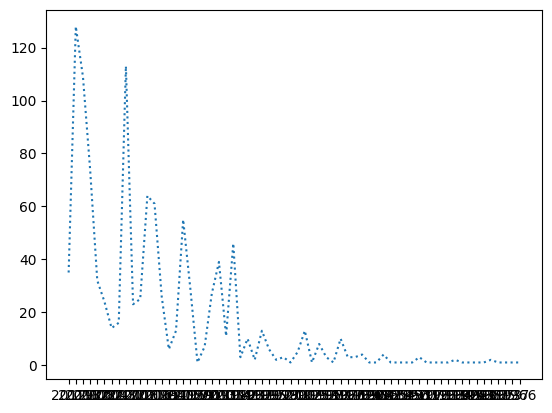

In [ ]:
yearcsv= pd.read_csv('yearcounts.csv')

plt.plot(yearcsv['Year'], yearcsv['Counts'], linestyle = 'dotted')


In [ ]:
genredata = completebook_metadata[["Author_x", "Title", "Genre"]]

In [ ]:
genres = genredata["Genre"]
genrecounts = {}
for genre in genres:
  if genre not in genrecounts:
    genrecounts[genre] = 0
    genrecounts[genre] += 1
  elif genre in genrecounts:
    genrecounts[genre] += 1



In [ ]:
from inspect import getinnerframes
genrecountheader = ["Genre", "Counts"]
genrerowdata = []
for genre in genrecounts:
  row = [genre, genrecounts[genre]]
  genrerowdata.append(row)


genredata = pd.DataFrame(genrerowdata, columns= genrecountheader)
genredata.to_csv('genrecounts.csv', index = False)

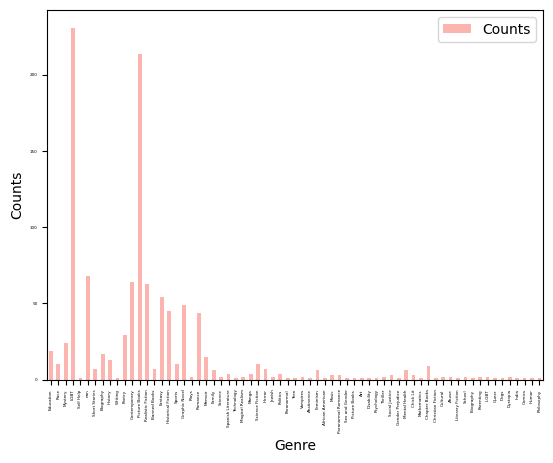

In [ ]:
genrecounts = pd.read_csv('genrecounts.csv')
genrecounts.set_index("Genre").plot.bar(xlabel="Genre", ylabel="Counts",colormap="Pastel1", fontsize=3);